# Fit B-Splines to $a$

## Running with PypeIt!

In [1]:
# imports
import os
import numpy as np

from sklearn import decomposition

from matplotlib import pyplot as plt
import seaborn as sns

import xarray

from pypeit.core import fitting
from pypeit.bspline import bspline

In [2]:
%matplotlib widget

# Info

## X=1,2,4:  Nothing, Raman, Raman+Flourescence

## YY = Sun zenith angle

## 3320 different IOP combinations

# Load 

In [3]:
l23_path = os.path.join(os.getenv('OS_COLOR'),
                        'data' ,'Loisel2023')

## Variables

In [4]:
variable_file = os.path.join(l23_path, 'Hydrolight400.nc')

In [5]:
ds = xarray.load_dataset(variable_file)
ds

<xarray.Dataset>
Dimensions:  (Lambda: 81, IOP_Scenario: 3320)
Coordinates:
  * Lambda   (Lambda) float32 350.0 355.0 360.0 365.0 ... 740.0 745.0 750.0
Dimensions without coordinates: IOP_Scenario
Data variables: (12/17)
    Rrs      (IOP_Scenario, Lambda) float32 0.01176 0.01201 ... 3.041e-05
    Ed_0+    (IOP_Scenario, Lambda) float32 0.7753 0.7314 0.7207 ... 1.237 1.222
    Lw       (IOP_Scenario, Lambda) float32 0.009118 0.008785 ... 3.716e-05
    Lu_0+    (IOP_Scenario, Lambda) float32 0.04075 0.03903 ... 0.06316 0.0624
    a        (IOP_Scenario, Lambda) float32 0.03096 0.02925 ... 2.83 2.85
    anw      (IOP_Scenario, Lambda) float32 0.02386 0.02245 ... 0.0005 0.0004
    ...       ...
    bph      (IOP_Scenario, Lambda) float32 0.04521 0.04454 ... 0.1013 0.1008
    bd       (IOP_Scenario, Lambda) float32 0.03323 0.03239 ... 0.03532 0.03513
    bb       (IOP_Scenario, Lambda) float32 0.006968 0.006587 ... 0.001876
    bbnw     (IOP_Scenario, Lambda) float32 0.00105 0.001028 ... 0.001641
    bbph     (IOP_Scenario, Lambda) float32 0.0004521 0.0004454 ... 0.001008
    bbd      (IOP_Scenario, Lambda) float32 0.0005982 0.000583 ... 0.0006324

In [6]:
wv64 = ds.Lambda.data.astype(np.float64)
wv64

array([350., 355., 360., 365., 370., 375., 380., 385., 390., 395., 400.,
       405., 410., 415., 420., 425., 430., 435., 440., 445., 450., 455.,
       460., 465., 470., 475., 480., 485., 490., 495., 500., 505., 510.,
       515., 520., 525., 530., 535., 540., 545., 550., 555., 560., 565.,
       570., 575., 580., 585., 590., 595., 600., 605., 610., 615., 620.,
       625., 630., 635., 640., 645., 650., 655., 660., 665., 670., 675.,
       680., 685., 690., 695., 700., 705., 710., 715., 720., 725., 730.,
       735., 740., 745., 750.])

# Plot a few

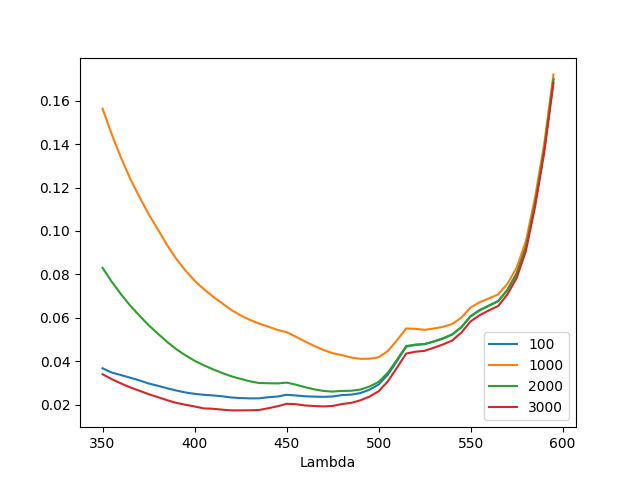

In [165]:
waves = ds.Lambda.data < 600.
fig = plt.figure()
plt.clf()
ax = plt.gca()
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[100,waves], ax=ax, label='100')
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[1000,waves], ax=ax, label='1000')
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[2000,waves], ax=ax, label='2000')
sns.lineplot(x=ds.Lambda[waves], y=ds.a.data[3000,waves], ax=ax, label='3000')
ax.legend()

plt.show()

# B-spline time

## Init

In [99]:
bkpts = np.array([312.30769231, 331.15384615, 350.        , 368.84615385,
       387.69230769, 406.53846154, 425.38461538, 444.23076923,
       463.07692308, 481.92307692, 500.76923077, 515., 519.61538462,
       538.46153846, 557.30769231, 576.15384615, 595.        ,
       613.84615385, 632.69230769])

In [152]:
bkpts2 = np.array([312.30769231, 331.15384615, 350.        , 
       387.69230769, 425.38461538, 
       463.07692308, 475., 491.92307692, 512., 528.,
       538.46153846, 550.30769231, 575.,
                   595.        ,
       613.84615385, 632.69230769])

In [210]:
bkpts2.size-4

12

In [192]:
wv64[cut][::4]

array([350., 370., 390., 410., 430., 450., 470., 490., 510., 530., 550.,
       570., 590.])

In [193]:
wv64[cut]

array([350., 355., 360., 365., 370., 375., 380., 385., 390., 395., 400.,
       405., 410., 415., 420., 425., 430., 435., 440., 445., 450., 455.,
       460., 465., 470., 475., 480., 485., 490., 495., 500., 505., 510.,
       515., 520., 525., 530., 535., 540., 545., 550., 555., 560., 565.,
       570., 575., 580., 585., 590., 595.])

In [200]:
bkpts3 = [340.] + (wv64[cut][::3]+2.5).tolist() + [600.]
bkpts3 = np.array(bkpts3)
bkpts3

array([340. , 352.5, 367.5, 382.5, 397.5, 412.5, 427.5, 442.5, 457.5,
       472.5, 487.5, 502.5, 517.5, 532.5, 547.5, 562.5, 577.5, 592.5,
       600. ])

In [208]:
bkpts3.size - 2

17

In [201]:
cut = wv64 < 600.
my_bspline = bspline(wv64[cut], nord=3, 
                     #everyn=3) 
                     fullbkpt=bkpts3)
                     #nbkpts=14)
                     #everyn=4) 

In [202]:
my_bspline.breakpoints

array([340. , 352.5, 367.5, 382.5, 397.5, 412.5, 427.5, 442.5, 457.5,
       472.5, 487.5, 502.5, 517.5, 532.5, 547.5, 562.5, 577.5, 592.5,
       600. ])

In [203]:
#tmp = my_bspline.breakpoints.tolist() + [515.]
#my_bspline.breakpoints = np.array(tmp)

In [204]:
idx = 1000
code, yfit = my_bspline.fit(wv64[cut], 
                            ds.a.data[idx,cut].astype(np.float64),
                        np.ones_like(wv64[cut]))
code

0

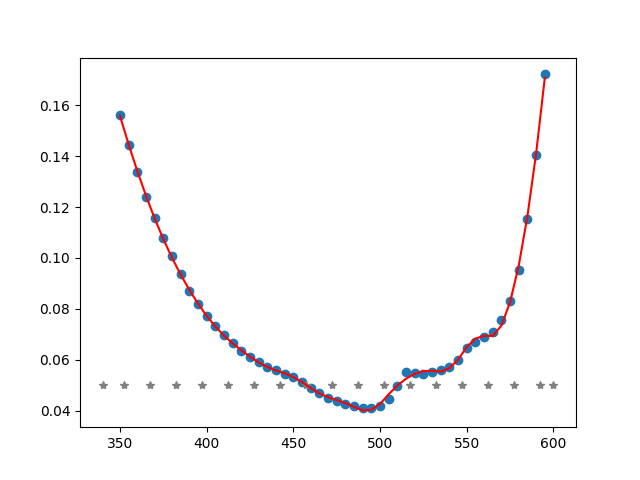

In [205]:
fig = plt.figure()
plt.clf()
ax = plt.gca()
#
# Data
ax.plot(wv64[cut], ds.a.data[idx,cut], 'o')
# Breakpoints
ax.plot(my_bspline.breakpoints, 
        0.05*np.ones(len(my_bspline.breakpoints)), '*', color='gray')

# Fit
ax.plot(wv64[cut], yfit, 'r-')

plt.show()

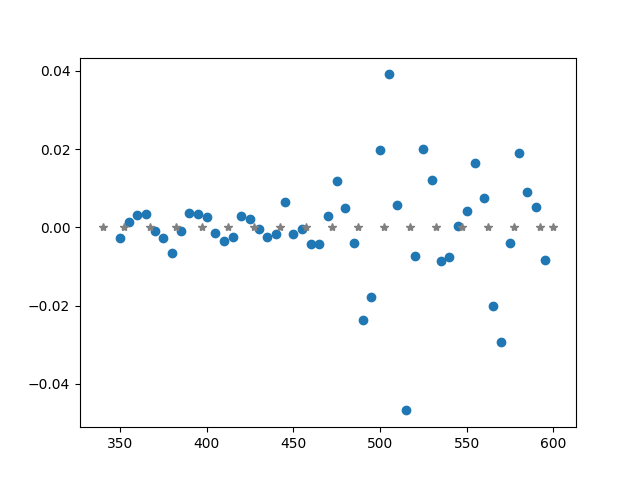

In [206]:
fig = plt.figure()

plt.clf()
ax = plt.gca()
#
# Data
ax.plot(wv64[cut], (yfit-ds.a.data[idx,cut])/yfit, 'o')
# Breakpoints
ax.plot(my_bspline.breakpoints, 
        0.*np.ones(len(my_bspline.breakpoints)), '*', color='gray')

# Fit
#ax.plot(wv64[cut], yfit, 'r-')

plt.show()

## Bad Fit

In [24]:
idx = 1000
(sset, outmask) = fitting.iterfit(xdata=wv64,
                                  ydata=var.a.data[idx].astype(np.float64),
                                  nord=4,
                                  maxiter=0,
                                  #kwargs_bspline={'everyn':7},
                                  kwargs_bspline={'nbkpts':10},
                                 )

In [25]:
yfit, _ = sset.value(wv64)

In [26]:
sset.breakpoints

array([216.66666667, 261.11111111, 305.55555556, 350.        ,
       394.44444444, 438.88888889, 483.33333333, 527.77777778,
       572.22222222, 616.66666667, 661.11111111, 705.55555556,
       750.        , 794.44444444, 838.88888889, 883.33333333])

## Show 

In [23]:
wv64

array([350., 355., 360., 365., 370., 375., 380., 385., 390., 395., 400.,
       405., 410., 415., 420., 425., 430., 435., 440., 445., 450., 455.,
       460., 465., 470., 475., 480., 485., 490., 495., 500., 505., 510.,
       515., 520., 525., 530., 535., 540., 545., 550., 555., 560., 565.,
       570., 575., 580., 585., 590., 595., 600., 605., 610., 615., 620.,
       625., 630., 635., 640., 645., 650., 655., 660., 665., 670., 675.,
       680., 685., 690., 695., 700., 705., 710., 715., 720., 725., 730.,
       735., 740., 745., 750.])

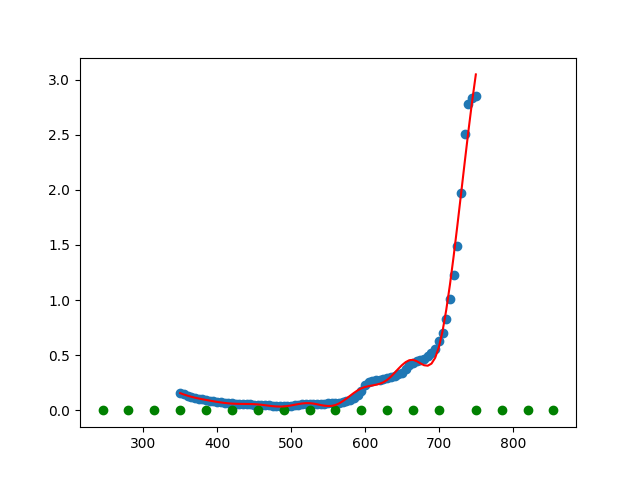

In [22]:
plt.clf()
ax = plt.gca()
#
# Data
ax.plot(wv64, var.a.data[idx], 'o')
# Breakpoints
ax.plot(sset.breakpoints, np.zeros(len(sset.breakpoints)), 'go')

# Fit
ax.plot(wv64, yfit, 'r-')

plt.show()